(workflow-basics)=
# Workflow Basics

This chapter will take you through some of the essential parts of a Python workflow.

## Prerequisites

You'll need an installation of Python and Visual Studio Code with the Python extensions to get to grips with this chapter. If you haven't installed those yet, head back to {ref}`code-preliminaries` and follow the instructions there.

## Working with Python scripts and the interactive window

As a reminder, the figure below shows the typical layout of Visual Studio Code.

![A typical user view in Visual Studio Code](https://github.com/aeturrell/coding-for-economists/blob/main/img/vscode_layout.png?raw=true)

When you create a new script (File->New File->Save as 'your_script_name.py), it will appear in the part of the screen labelled as 3.

To run a script, select the code you want to run, right click, and select "Run Selection/Line in Interactive Window". You can also hit shift + enter if you set this shortcut up; if you haven't it's well worth doing and you can find the instructions in {ref}`code-preliminaries`.

Using the "Run Selection/Line in Interactive Window" option or using the shortcut will cause panel 5 in the above diagram (the interactive window) to appear, where you will see the code run and the outputs of your script appear.

```{tip}
If you have an issue getting the code to run in the interactive window, first check the instructions in {ref}`code-preliminaries`. If you're still having issues, it may be that Visual Studio Code isn't sure which Python to run, or where Python is on your system. To fix the latter problem, hit the "Select kernel" button in the top right-hand side of the interactive window.
```

When you are first writing a script, it's useful to be able to move back and forth between the script and the interactive window. You might execute a line of code (put the cursor on the relevant line and hit shift and enter) in the interactive window, then manually write out some code in the interactive window's execution box (seen at the bottom of panel 5 saying "Type code here..."), and then explore some of the variables you've created with the variable explorer (using the button "Variables") at the top of the interactive window.

But, once you've honed the code in your script, it's good to make the script a complete analytical process that you are happy running end-to-end and that—for production or 'final' work—you would use the "Run Current File in Interactive Window" option to run all the way through. This is good practice because *what is in your script is reproducible* but what you've entered manually in the interactive window is not. And you want the outputs from your code to be reproducible and understandable by others (including future you!), but this is hard if there are undocumented extra lines of code that you only did on the fly via the interactive window's execution box.

## Using installed packages and modules

We already saw how to install packages in {ref}`code-preliminaries`. If you forgot, look back at how to do this now. In short, packages are installed using the command line or, on Windows, the Anaconda prompt. With either of these open, type `conda install packagename` and hit enter to both search for and install the package you need.

What about using a package that you've installed? That's what we'll look at now.

Let's see an example of using the powerful numerical library **numpy**. There are different ways to import packages to use within a script or notebook; you can import the entire package in one go or just import the functions you need (if you know their names). When an entire package is imported, you can give it any name you like and the convention for **numpy** is to import it as the shortened 'np'. All of the functions and methods of the package can be accessed by typing `np` followed by `.` and then typing the function name. This convention of importing packages with a given name makes your code easier to read, because you know exactly which package is doing what, and avoids any conflicts when functions from different packages have the same name.

As well as demonstrating importing the whole package for **numpy**, the example below shows importing just one specific function from **numpy**, `inv`, which does matrix inversion. Note that because `inv` was imported separately it can be used without an `np` prefix.

In [1]:
import numpy as np
from numpy.linalg import inv

matrix = np.array([[4.0, 2.0, 4.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]])

print("Matrix:")
print(matrix)

inv_mat = inv(matrix)
print("Inverse:")
print(inv_mat)

Matrix:
[[4. 2. 4.]
 [4. 5. 6.]
 [7. 8. 9.]]
Inverse:
[[ 0.25       -1.16666667  0.66666667]
 [-0.5        -0.66666667  0.66666667]
 [ 0.25        1.5        -1.        ]]


In [2]:
import numpy as np
from numpy.linalg import inv

matrix = np.array([[4.0, 2.0, 4.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]])

print("Matrix:")
print(matrix)

inv_mat = inv(matrix)
print("Inverse:")
print(inv_mat)

Matrix:
[[4. 2. 4.]
 [4. 5. 6.]
 [7. 8. 9.]]
Inverse:
[[ 0.25       -1.16666667  0.66666667]
 [-0.5        -0.66666667  0.66666667]
 [ 0.25        1.5        -1.        ]]


We could have imported all of **numpy** and it used it without extension using `from numpy import *` but this is considered bad practice as it fills our 'namespace' with function names that might clash with other packages and it's less easy to read because you don't know which function came from which package (one of Python's mantras is "explicit is better than implict"). However, some packages are *designed* to be used like this, so, for example, you will see `from lets_plot import *` in this book.

```{note}
If you want to check what packages you have installed in your Python environment, run `conda list` on your computer's command line (aka the *terminal* or *command prompt*).
```

Sometimes you might forget what a function you have imported does! Or at least, you might not be sure what all of the optional arguments are. In Visual Studio Code, you can just hover your cursor over the name of the function and a box will come up that tells you everything you need to know about it. This box is auto-generated by doc-strings; information that is written in text just under a function's definition (`def` statement).

An alternative way to see what a function does is to use a wonderful package called [**rich**](https://github.com/willmcgugan/rich) that does many things including providing an `inspect()` function. You will need to use `pip` to install rich by running `pip install rich` on the command line. Here's an example of using **rich**'s inpsect method on the `inv()` function we imported above (`methods=True` reports all of the functionality of `inv()`):

In [3]:
from rich import inspect

inspect(inv, help=True)

╭─────────────── <function inv at 0x000002308AF6F560> ────────────────╮
│ def inv(a):                                                         │
│                                                                     │
│ Compute the (multiplicative) inverse of a matrix.                   │
│                                                                     │
│ Given a square matrix `a`, return the matrix `ainv` satisfying      │
│ ``dot(a, ainv) = dot(ainv, a) = eye(a.shape[0])``.                  │
│                                                                     │
│ Parameters                                                          │
│ ----------                                                          │
│ a : (..., M, M) array_like                                          │
│     Matrix to be inverted.                                          │
│                                                                     │
│ Returns                                                             │
│ -------                                                             │
│ ainv : (..., M, M) ndarray or matrix                                │
│     (Multiplicative) inverse of the matrix `a`.                     │
│                                                                     │
│ Raises                                                              │
│ ------                                                              │
│ LinAlgError                                                         │
│     If `a` is not square or inversion fails.                        │
│                                                                     │
│ See Also                                                            │
│ --------                                                            │
│ scipy.linalg.inv : Similar function in SciPy.                       │
│                                                                     │
│ Notes                                                               │
│ -----                                                               │
│                                                                     │
│ .. versionadded:: 1.8.0                                             │
│                                                                     │
│ Broadcasting rules apply, see the `numpy.linalg` documentation for  │
│ details.                                                            │
│                                                                     │
│ Examples                                                            │
│ --------                                                            │
│ >>> from numpy.linalg import inv                                    │
│ >>> a = np.array([[1., 2.], [3., 4.]])                              │
│ >>> ainv = inv(a)                                                   │
│ >>> np.allclose(np.dot(a, ainv), np.eye(2))                         │
│ True                                                                │
│ >>> np.allclose(np.dot(ainv, a), np.eye(2))                         │
│ True                                                                │
│                                                                     │
│ If a is a matrix object, then the return value is a matrix as well: │
│                                                                     │
│ >>> ainv = inv(np.matrix(a))                                        │
│ >>> ainv                                                            │
│ matrix([[-2. ,  1. ],                                               │
│         [ 1.5, -0.5]])                                              │
│                                                                     │
│ Inverses of several matrices can be computed at once:               │
│                                                                     │
│ >>> a = np.array([[[1., 2.], [3., 4.]], [[1, 3], [3, 5]]])          │
│ >>> inv(a)                            

In [4]:
from rich import inspect

inspect(inv, help=True)

╭─────────────── <function inv at 0x000002308AF6F560> ────────────────╮
│ def inv(a):                                                         │
│                                                                     │
│ Compute the (multiplicative) inverse of a matrix.                   │
│                                                                     │
│ Given a square matrix `a`, return the matrix `ainv` satisfying      │
│ ``dot(a, ainv) = dot(ainv, a) = eye(a.shape[0])``.                  │
│                                                                     │
│ Parameters                                                          │
│ ----------                                                          │
│ a : (..., M, M) array_like                                          │
│     Matrix to be inverted.                                          │
│                                                                     │
│ Returns                                                             │
│ -------                                                             │
│ ainv : (..., M, M) ndarray or matrix                                │
│     (Multiplicative) inverse of the matrix `a`.                     │
│                                                                     │
│ Raises                                                              │
│ ------                                                              │
│ LinAlgError                                                         │
│     If `a` is not square or inversion fails.                        │
│                                                                     │
│ See Also                                                            │
│ --------                                                            │
│ scipy.linalg.inv : Similar function in SciPy.                       │
│                                                                     │
│ Notes                                                               │
│ -----                                                               │
│                                                                     │
│ .. versionadded:: 1.8.0                                             │
│                                                                     │
│ Broadcasting rules apply, see the `numpy.linalg` documentation for  │
│ details.                                                            │
│                                                                     │
│ Examples                                                            │
│ --------                                                            │
│ >>> from numpy.linalg import inv                                    │
│ >>> a = np.array([[1., 2.], [3., 4.]])                              │
│ >>> ainv = inv(a)                                                   │
│ >>> np.allclose(np.dot(a, ainv), np.eye(2))                         │
│ True                                                                │
│ >>> np.allclose(np.dot(ainv, a), np.eye(2))                         │
│ True                                                                │
│                                                                     │
│ If a is a matrix object, then the return value is a matrix as well: │
│                                                                     │
│ >>> ainv = inv(np.matrix(a))                                        │
│ >>> ainv                                                            │
│ matrix([[-2. ,  1. ],                                               │
│         [ 1.5, -0.5]])                                              │
│                                                                     │
│ Inverses of several matrices can be computed at once:               │
│                                                                     │
│ >>> a = np.array([[[1., 2.], [3., 4.]], [[1, 3], [3, 5]]])          │
│ >>> inv(a)                            

```{admonition} Exercise
Write a code block that imports the **numpy** function `numpy.linalg.det()` as `det()`. Run `inspect()` on it. Find the determinant of `[[4, 3], [1, 7]]`.
```

### Modules

Sometimes, you will want to call in some code from a different script that *you* wrote (rather than from a package provided by someone else). Imagine you have several scripts with code in, a, b, and c, all of which need to use the same underlying function that you have written. What do you do? (Note that "script with code in" is just a text file that has a `.py` extension and contains code.)

A central tenet of good coding is that you *do not repeat yourself*. Therefore, a bad solution to this problem would be to copy and paste the same code into all three of the scripts. A *good* solution is to write the code that's need just once in a separate 'utility' script and have the other scripts import that one function. This also adheres to another important programming principle: that of writing modular code.

This schematic shows the kind of situation we're talking about:

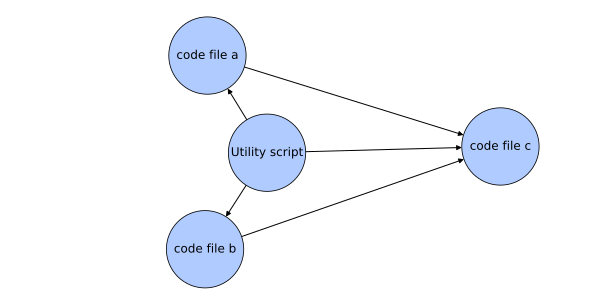

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

# Plot settings
plt.style.use(
    "https://github.com/aeturrell/coding-for-economists/raw/main/plot_style.txt"
)
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")


graph = nx.DiGraph()
graph.add_edges_from(
    [
        ("Utility script", "code file a"),
        ("Utility script", "code file b"),
        ("code file a", "code file c"),
        ("code file b", "code file c"),
        ("Utility script", "code file c"),
    ]
)
colour_node = "#AFCBFF"
fixed_pos = nx.spring_layout(graph, seed=100)
nx.draw(graph, pos=fixed_pos, with_labels=True, node_size=6000, node_color=colour_node)
extent = 1.4
plt.xlim(-extent, extent)
plt.ylim(-extent, extent)
plt.show();

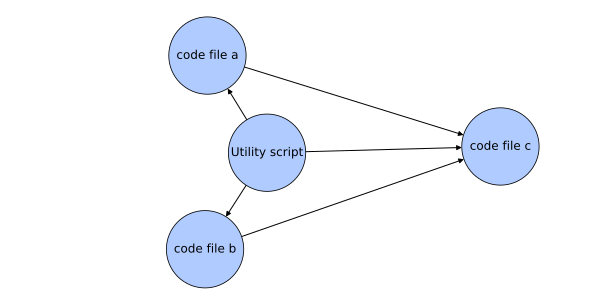

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

# Plot settings
plt.style.use(
    "https://github.com/aeturrell/coding-for-economists/raw/main/plot_style.txt"
)
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")


graph = nx.DiGraph()
graph.add_edges_from(
    [
        ("Utility script", "code file a"),
        ("Utility script", "code file b"),
        ("code file a", "code file c"),
        ("code file b", "code file c"),
        ("Utility script", "code file c"),
    ]
)
colour_node = "#AFCBFF"
fixed_pos = nx.spring_layout(graph, seed=100)
nx.draw(graph, pos=fixed_pos, with_labels=True, node_size=6000, node_color=colour_node)
extent = 1.4
plt.xlim(-extent, extent)
plt.ylim(-extent, extent)
plt.show();

How can we give code files a, b, and c access to the functions etc in the "Utility script"? We would define a file 'utilities.py' that had the following function in that we would like to use in the other code files:

```python
# Contents of utilities.py file
def really_useful_func(number):
    return number*10
```

Then, in 'code_script_a.py', we would write:

In [7]:
import utilities as utils

print(utils.really_useful_func(20))

ModuleNotFoundError: No module named 'utilities'

An alternative is to *just* import the function we want, with the name we want:

In [8]:
from utilities import really_useful_func as ru_fn

print(ru_fn(30))

ModuleNotFoundError: No module named 'utilities'

Another important example is the case where you want to run 'utilities.py' as a standalone script, but still want to borrow functions from it to run in other scripts. There's a way to do this. Let's change utilities.py to

```python
# Contents of utilities.py file
def really_useful_func(number):
    return number*10


def default_func():
    print('Script has run')


if __name__ == '__main__':
    default_func()
```

What this says is that if we call 'utilities.py' from the command line, eg

```bash
python utilities.py
```

It will return `Script has run` because, by executing the script alone, we are asking for anything in the `main` block defined at the end of the file to be run. But we can still import anything from utilities into other scripts as before--and in that case it is not the main script, but an import, and so the `main` block will *not* be executed by default.

You can important several functions at once from a module (aka another script file) like this:

```python
from utilities import really_useful_func, default_func
```

```{admonition} Exercise
Write your own `utilities.py` that has a `super_useful_func` that accepts a number and returns the number divided by 10. In another script, `main.py`, try a) importing all of utilities and running `super_useful_func` on a number and, b), importing just `super_useful_func` from utilities and running it on a number.
```

## Reading and writing files

Although most applications in economics will use the **pandas** package to read and write tabular data, it's sometimes useful to know how to read and write arbitrary files using the built-in Python libraries too. To open a file

```python
open('filename', mode)
```

where `mode` could be `r` for read, `a` for append, `w` for write, and `x` to create a file. Create a file called `text_example.txt` and write a single line in it, 'hello world'. To open the file and print the text, use:

```python
with open('text_example.txt') as f:
    text_in = f.read()

print(text_in)
```

```python
'hello world!\n'
```

`\n` is the new line character. Now let's try adding a line to the file:

```python
with open('text_example.txt', 'a') as f:
    f.write('this is another line\n')
```

Writing and reading files using the `with` command is a quick and convenient shorthand for the less concise open, action, close pattern. For example, the above example can also be written as:

```python
f = open('text_example.txt', 'a')
f.write('this is another line\n')
f.close()
```

Although this short example shows opening and writing a text file, this approach can be used to edit a wide range of file extensions including .json, .xml, .csv, .tsv, and many more, including binary files in addition to plain text files.